# Exercise 4: Logistic Regression, Bayes and EM

In this assignment you will implement several algorithms as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) and pandas. 
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw4_123456789_987654321.ipynb` if you submitted in pairs and `hw4_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Implement Logistic Regression algorithm.
1. Implement EM algorithm.
1. Implement Navie Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions: *** GuyMaduel206958423 , RanYanay315577452 ***

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values


## Visualizing the data
(2 points each - 8 points total)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

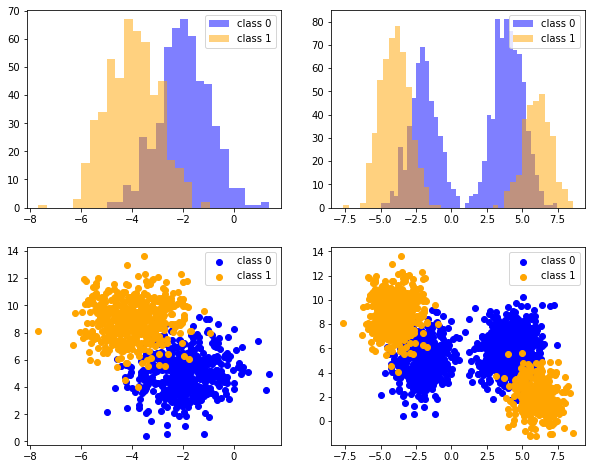

In [4]:
#### Your code here ####

#first histogram
training_set_f1k = np.array(training_set)[0:1000:]
feature_0_class_0_1k = training_set_f1k[training_set_f1k[:,2] == 0, 0]
feature_0_class_1_1k = training_set_f1k[training_set_f1k[:,2] == 1, 0]



#second histogram
training_set_full = np.array(training_set)
feature_0_class_0_full = training_set_full[training_set_full[:,2] == 0, 0]
feature_0_class_1_full = training_set_full[training_set_full[:,2] == 1, 0]



#third histogram
feature_1_class_0_1k = training_set_f1k[training_set_f1k[:,2] == 0, 1]
feature_1_class_1_1k = training_set_f1k[training_set_f1k[:,2] == 1, 1]

#forth histogram
feature_1_class_0_full = training_set_full[training_set_full[:,2] == 0, 1]
feature_1_class_1_full = training_set_full[training_set_full[:,2] == 1, 1]


#making 4 histograms
fig, axs = plt.subplots(2,2)

#first histrogram 
axs[0, 0].hist(feature_0_class_0_1k, bins = 20, alpha = 0.5 , color = "blue" , label='class 0')
axs[0, 0].hist(feature_0_class_1_1k, bins = 20, alpha = 0.5 , color = "orange", label='class 1')
axs[0, 0].legend()

#second histogram
axs[0, 1].hist(feature_0_class_0_full, bins = 40, alpha = 0.5 , color = "blue" , label='class 0')
axs[0, 1].hist(feature_0_class_1_full, bins = 40, alpha = 0.5 , color = "orange", label='class 1')
axs[0, 1].legend()

#third histogram
axs[1, 0].scatter(feature_0_class_0_1k, feature_1_class_0_1k, color = 'blue', label='class 0')
axs[1, 0].scatter(feature_0_class_1_1k, feature_1_class_1_1k, color = 'orange', label='class 1')
axs[1, 0].legend()

#forth histogram
axs[1, 1].scatter(feature_0_class_0_full, feature_1_class_0_full, color = 'blue', label='class 0')
axs[1, 1].scatter(feature_0_class_1_full, feature_1_class_1_full, color = 'orange', label='class 1')
axs[1, 1].legend()



## Logistic Regression

(15 Points)

Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [5]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state
        self.cost_history = []
        self.theata = []

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        
        X = bias_trick(X)
        np.random.seed(self.random_state)
        theata_random = np.random.random(X.shape[1])
        
        prev_cost = 0
        current_cost = compute_cost(X, theata_random, y)
        
        for i in range(self.n_iter):
            hypo = hypothesis(X,theata_random)
            #theata_random -= (self.eta/X.shape[0]) * np.dot((hypo - y), X)
            theata_random -= self.eta * np.dot((hypo - y), X)
            self.cost_history.append(current_cost)
            prev_cost = current_cost
            current_cost = compute_cost(X, theata_random, y)
            
            if prev_cost - current_cost < self.eps:
                break

        self.theata = theata_random
        pass
    
    
    def predict(self, X):
        """Return the predicted class label"""
        m = X.shape[0]
        X = bias_trick(X)
        predicts = [ 1 if hypothesis(X[i], self.theata) > 0.5 else 0 for i in range(m) ]
        return np.array(predicts)
        pass
    
#out-side the class    

def hypothesis(X, theata):
    return 1 / (1 + np.exp(-np.dot(X, theata.T)))
    
def compute_cost(X, theata, y):
    return np.mean((-y * np.log(hypothesis(X,theata))) - ((1 - y)*np.log(1 - hypothesis(X,theata))))
        
def bias_trick(X):
    ones = np.ones(X.shape[0], dtype=int)
    return np.column_stack((ones,X))

def accuracy(self, X, y):
    predicts = self.predict(X)
    accuracy = sum(predicts == y) / y.shape[0]
    return accuracy


        

In [6]:
# test for Logistic Regression
onek_lr = LogisticRegressionGD()
onek_lr.fit(X_training[:1000], y_training[:1000])
print("accuracy on train for first 1000 points:", accuracy(onek_lr, X_training[:1000], y_training[:1000]))
print("accuracy on test for first 1000 points:", accuracy(onek_lr, X_test[:500], y_test[:500]))

alldata_lr2 = LogisticRegressionGD()
alldata_lr2.fit(X_training, y_training)
print("accuracy on train for all points:", accuracy(alldata_lr2, X_training, y_training))
print("accuracy on test for all points:", accuracy(alldata_lr2, X_test, y_test))



accuracy on train for first 1000 points: 0.965
accuracy on test for first 1000 points: 0.938
accuracy on train for all points: 0.809
accuracy on test for all points: 0.804


## Cross Validation

(5 points)

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [7]:
#### Your code here ####
import itertools

etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

best_eta = 0
best_eps = 0
max_final_accuracy = 0
mean_accuracy = 0

training_fulldata = np.array(training_set)
np.random.shuffle(training_fulldata)        #shuffle all data

x = training_fulldata[: ,0:-1]              #getting all columns without class column
y = training_fulldata[:,-1]                 #getting just class column

subsets_list_x = np.split(x, 5, axis = 0)   #spliy by rows(sampels)
subsets_list_y = np.split(y, 5, axis = 0)

pairs_of_eta_eps = itertools.product(etas, epss)        #making certisian product of the lists

for eta , eps in pairs_of_eta_eps:
    for x, y in  zip(subsets_list_x,subsets_list_y):   #pairs of (x,y) 
        logiregression = LogisticRegressionGD(eta=eta, n_iter=10000, eps=eps, random_state=1)  #making instance
        logiregression.fit(x,y)                           #train instance lg
        predictions = logiregression.predict(x)           #predicts
        correct_predictions = np.sum(predictions == y)    #checking how many predicts are correct
        mean_accuracy += (correct_predictions/len(x))     # adding to mean
        
        
    mean_accuracy = mean_accuracy / 5 
    if mean_accuracy > max_final_accuracy:
        max_final_accuracy = mean_accuracy
        best_eta = eta
        best_eps = eps
        
    mean_accuracy = 0    
        

print("best epsilon",best_eps)
print("best eta",best_eta)        
        
        
#print(y)

best epsilon 1e-06
best eta 5e-05


## Normal distribution pdf

(2 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [8]:
#### Your code here ####
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    e_power = -0.5 * (((data-mu)/sigma)**2)
    
    right_side = np.exp(e_power)
    left_side = 1 / (sigma * ((2*np.pi)**-0.5))
    
    return left_side * right_side

## Expectation Maximization

(15 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [9]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k = 1, n_iter=1000, eps=0.01, random_state = 42):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps
        self.costs = []
        self.mu = np.array([])
        self.sigma = np.array([])
        self.weights =np.array([])
        self.random_state = random_state

    def init_params(self, data):
        """
        Initialize distribution params
        
        """
        np.random.seed(self.random_state)
        self.weights = np.full(self.k, (1/self.k)) #Return a new array of given shape and type, filled with fill_value (size, value).
        self.mu = np.random.random(self.k)
        self.sigma = np.random.random(self.k)
        
    
    
    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        list_respo =[]
        for k in range(self.k):
            current_respo = self.weights[k] * norm_pdf(data, self.mu[k], self.sigma[k])
            list_respo.append(current_respo)
            
        responsibilities = list_respo        
        responsibilities /= sum(responsibilities)
        self.responsibilities = np.array(responsibilities).T
        
        
    def maximization(self, data):
        """
        M step - updating distribution params
        """
        self.weights = self.responsibilities.mean(axis = 0)
        
        for k in range(self.k):
            sub_responsibilities = self.responsibilities[:, k]
            denominator = data.shape[0] * self.weights[k]
            #calc new mean and variance for each gaussian
            self.mu[k] = sub_responsibilities.dot(data) / denominator
            self.sigma[k] = (sub_responsibilities.dot((data - self.mu[k]) ** 2) / denominator)**(0.5)

    
    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then q and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        self.init_params(data=data)
        prev_cost = 0 
        current_cost = self.compute_cost(data=data)
        
        for i in range(self.n_iter):
            #training the data
            self.expectation(data=data)
            self.maximization(data=data)
            
            #checking costs
            prev_cost = current_cost
            current_cost = self.compute_cost(data=data)
            
            if (prev_cost - current_cost) < self.eps:
                break
        
        pass
    
    def compute_cost(self, data):
        cost = 0
        for k in range(self.k):
            for i in range(data.shape[0]):
                helper = self.weights[k] * norm_pdf(data=data[i], mu=self.mu[k], sigma=self.sigma[k])
                cost += -np.log(helper)
        return cost 
                               
    
    def get_dist_params(self):
        return np.array([self.weights, self.mu, self.sigma]).T
    
    

## Naive Bayes

(15 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [10]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, random_state = 42):
        self.k = k
        self.random_state = random_state
        self.classes = []
        self.priors = []
        self.params = []

    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        #intializing fileds.
        classes, count_for_each_class = np.unique(y, return_counts=True) #how many classes & how many smaples from each class
        self.classes = classes.tolist()
        self.priors = np.array([x / y.shape[0] for x in count_for_each_class])
        #print(X[0].shape[0])
        
        for c in range( len(self.classes) ):
            current_data = X[np.where(y==self.classes[c])]
            list_of_parms_for_each_col = []
            for col in range(X.shape[1]):
                EM_GMM = EM(k = self.k, random_state = self.random_state)   #new EM.
                EM_GMM.fit(current_data[:, col])                            #FIT the current feature.
                list_of_parms_for_each_col.append(EM_GMM.get_dist_params()) #getting his params + making a list for each feature.
            
            self.params.append([])
            self.params[c] = list_of_parms_for_each_col   
 
    def predict(self, X):
        """
        Return the predicted class label"""
        likelihood_list = []
        
        # calc likelihood
        for c in self.classes:
            likelihood = 1
            c_index = self.classes.index(c)
            for col in range(X.shape[1]):
                calc = 0
                for k in range(self.k):
                    cur_weight, curr_mu, curr_sigma = self.params[c_index][col][k]
                    calc += norm_pdf(X[:, col], curr_mu, curr_sigma) * cur_weight
                likelihood *= calc #NB ASSUMING
            likelihood_list.append(likelihood)  
            
        # calc posteriors
        posteriors = np.array([likelihood_list[self.classes.index(c)] * self.priors[self.classes.index(c)] for c in self.classes]).T     
        predicts = np.array([self.classes[np.argmax(row)] for row in posteriors])
        
        return predicts
    
    def accuracy(self, X, y):
        label_predicts = self.predict(X)
        correct_predict = np.count_nonzero(label_predicts == y)
        accuracy = correct_predict / len(y)
        return accuracy
    
    

## Model evaluation

(20 points)

In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points
1. Provide one or two sentences on each graph explaining what you observe in the graph.

#### Don't forget to label your graphs ####

In [11]:
#### Your code here ####
def calc_acc(classifire,X, y):
    predicts = classifire.predict(X)
    acc = np.sum(predicts == y)
    return acc/y.shape[0]

Logistic regression accuracy on 1k first points(training set): 0.965
Logistic regression accuracy on 500 first points(test set): 0.938
Naive Bayes accuracy on 1k first points(training set): 0.966
Naive Bayes accuracy on 500 first points(test set): 0.942


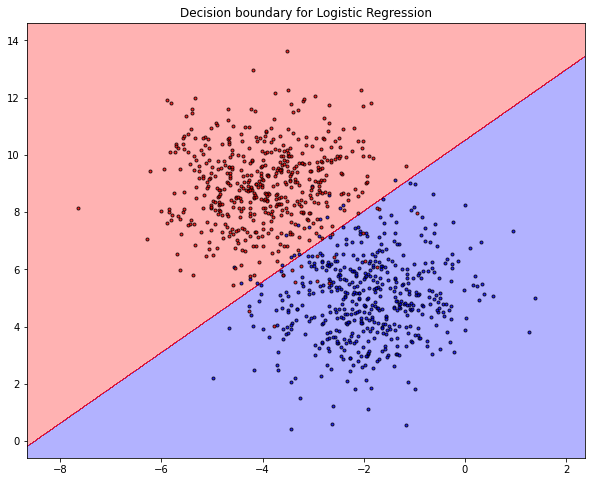

We can see that the data(first 1000 points) is almsot perfect linearly separable(BUT NOT PERFECT), espacially after we got 96.5 in the accuracy with the Logistic Regression model 


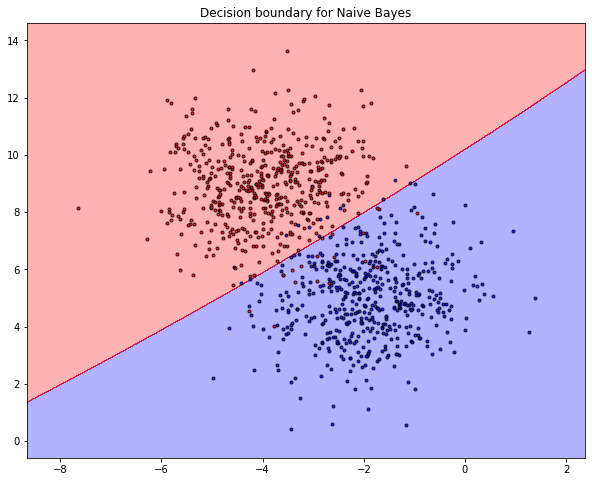

We can see that the data(first 1000 points) is almsot perfect linearly separable, with NB while K=1 we have 1 gaussian (for each feature) which is similar to the LR model, here we got 96.6 accuracy  


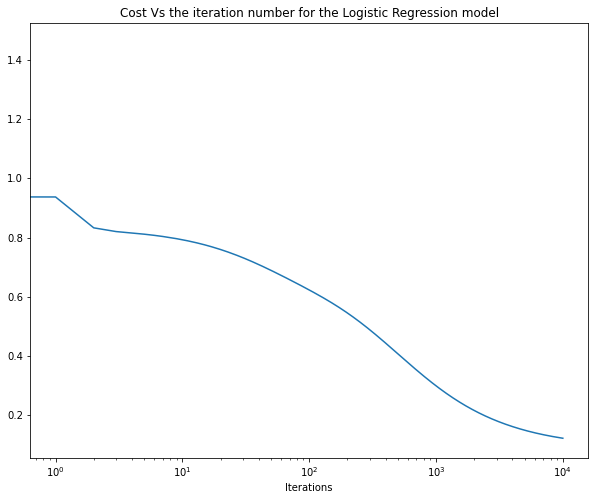

In each itreation the cost improved (reducing) and the hypothesis is becoming better, after 10^4 iteration its starting to converge. 


In [12]:
#extract first data points (1000 and 500)
X_training_1k= X_training[:1000]
y_training_1k= y_training[:1000]

X_test_500 = X_test[:500]
y_test_500 = y_test[:500]

#fit LR
LogisticR = LogisticRegressionGD(eta = best_eta, eps= best_eps)
LogisticR.fit(X_training_1k, y_training_1k)

#fit NB
NB_GMM = NaiveBayesGaussian(k = 1)
NB_GMM.fit(X_training_1k, y_training_1k)

LogisticR_accuracy_on_training = calc_acc(LogisticR,X_training_1k, y_training_1k)
LogisticR_accuracy_on_test = calc_acc(LogisticR,X_test_500, y_test_500)
NB_GMM_accuracy_on_training = calc_acc(NB_GMM,X_training_1k, y_training_1k)
NB_GMM_accuracy_on_test = calc_acc(NB_GMM,X_test_500, y_test_500)

print("Logistic regression accuracy on 1k first points(training set):", LogisticR_accuracy_on_training)
print("Logistic regression accuracy on 500 first points(test set):",LogisticR_accuracy_on_test)
print("Naive Bayes accuracy on 1k first points(training set):", NB_GMM_accuracy_on_training)
print("Naive Bayes accuracy on 500 first points(test set):",NB_GMM_accuracy_on_test)

#plot - Decision boundary LR 
plot_decision_regions(X_training_1k, y_training_1k, LogisticR)
plt.title("Decision boundary for Logistic Regression")
plt.show()
print("We can see that the data(first 1000 points) is almsot perfect linearly separable(BUT NOT PERFECT), espacially after we got 96.5 in the accuracy with the Logistic Regression model ")

#plot - Decision boundary NB
plot_decision_regions(X_training_1k, y_training_1k, NB_GMM)
plt.title("Decision boundary for Naive Bayes")
plt.show()
print("We can see that the data(first 1000 points) is almsot perfect linearly separable, with NB while K=1 we have 1 gaussian (for each feature) which is similar to the LR model, here we got 96.6 accuracy  ")

amount_of_costs = len(LogisticR.cost_history)
x_base = list(range(amount_of_costs))
plt.title("Cost Vs the iteration number for the Logistic Regression model")
plt.plot(x_base, LogisticR.cost_history)
plt.xscale('log')
plt.xlabel("Iterations")
plt.show()
print("In each itreation the cost improved (reducing) and the hypothesis is becoming better, after 10^4 iteration its starting to converge. ")

Logistic regression accuracy on trainning (all point):  0.809
Logistic regression accuracy on test (all point):  0.804
Naive Bayes accuracy on trainning (all point):  0.8885
Naive Bayes accuracy on test (all point):  0.873


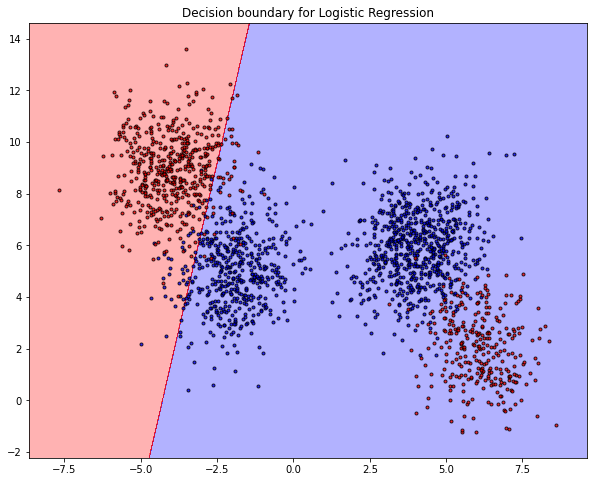

Using a logistic regression of all the data points plotted, we see that the data is not linearly seperatable therefore indicating that the algorithims output is not accurate as it only focuses on one data cluster rather than both.   


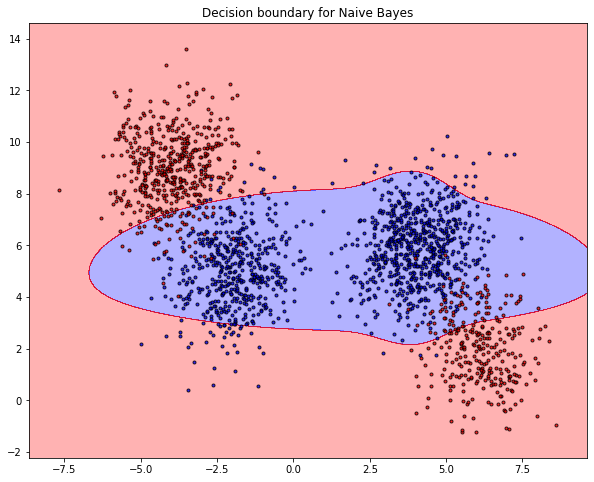

Using the naive bayes algorithim on all the data points, sucessfully identifies both clusters while seperating the data with higher accuracy as compared to the logistic regression model. Additionally, we see that the naive bayes algorithim is able to seperate the data more accurately when given a larger data set as compared to when it was given the first 1000 data points.   


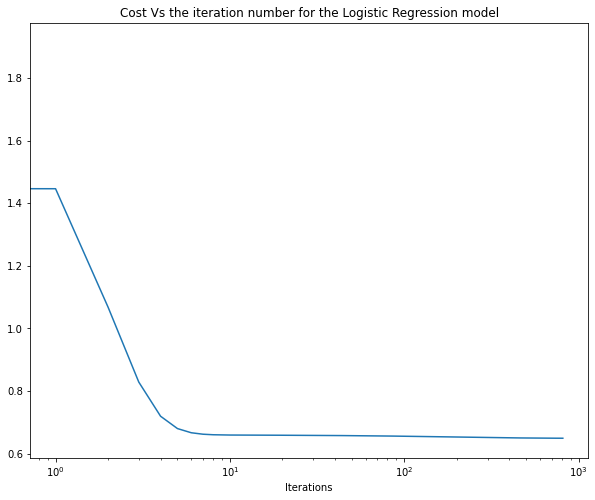

In each itreation the cost improved (reducing) and the hypothesis is becoming better, its starting to converge after 10^1 in comparison to 10^4 iterations before. 


In [13]:
#fit LR
LogisticR = LogisticRegressionGD(eta = best_eta, eps= best_eps)
LogisticR.fit(X_training, y_training)

#fit NB
NB_GMM = NaiveBayesGaussian(k = 2)
NB_GMM.fit(X_training, y_training)

LogisticR_accuracy_trainning = accuracy(LogisticR, X_training, y_training)
LogisticR_accuracy_test = accuracy(LogisticR, X_test, y_test)

NB_GMM_accuracy_trainning = NB_GMM.accuracy(X_training, y_training)
NB_GMM_accuracy_test = NB_GMM.accuracy(X_test, y_test)

print("Logistic regression accuracy on trainning (all point): ", LogisticR_accuracy_trainning)
print("Logistic regression accuracy on test (all point): ", LogisticR_accuracy_test)
print("Naive Bayes accuracy on trainning (all point): ", NB_GMM_accuracy_trainning)
print("Naive Bayes accuracy on test (all point): ", NB_GMM_accuracy_test)


#plot - Decision boundary LR 
plot_decision_regions(X_training, y_training, LogisticR)
plt.title("Decision boundary for Logistic Regression")
plt.show()
print("Using a logistic regression of all the data points plotted, we see that the data is not linearly seperatable therefore indicating that the algorithims output is not accurate as it only focuses on one data cluster rather than both.   ")

#plot - Decision boundary NB
plot_decision_regions(X_training, y_training, NB_GMM)
plt.title("Decision boundary for Naive Bayes")
plt.show()
print("Using the naive bayes algorithim on all the data points, sucessfully identifies both clusters while seperating the data with higher accuracy as compared to the logistic regression model. Additionally, we see that the naive bayes algorithim is able to seperate the data more accurately when given a larger data set as compared to when it was given the first 1000 data points.   ")

amount_of_costs = len(LogisticR.cost_history)
x_base = list(range(amount_of_costs))
plt.title("Cost Vs the iteration number for the Logistic Regression model")
plt.plot(x_base, LogisticR.cost_history)
plt.xscale('log')
plt.xlabel("Iterations")
plt.show()
print("In each itreation the cost improved (reducing) and the hypothesis is becoming better, its starting to converge after 10^1 in comparison to 10^4 iterations before. ")

## Open question

(20 points) 

1. In this homework we explored two types of models: Naive Bayes using EM, and Logistic regression.  
   1. Generate a dataset, in 3 dimensions (3 features), with 2 classes, using **only** Multivariate-Gaussians (as many as you want) that you think **Naive Bayes will work better than Logisitc Regression**.
   2. Generate another dataset, in 3 dimensions (3 features), with 2 classes, using **only** Multivariate-Gaussians (as many as you want) that you think **Logistic Regression will work better than Naive Bayes**.
   
   - Explain the reasoning behind each dataset.  

2. Visualize the datasets.  
   You can choose one of two options for the visualization:
    1. Plot three 2d graphs of all the features against each other (feature1 vs feature2, feature1 vs feature3, feature2 vs feature3).
    2. Plot one 3d graph.

**Important Note**  
For this question only, you may use:  
```
from scipy.stats import multivariate_normal
```

#### Your code and explanations here ####


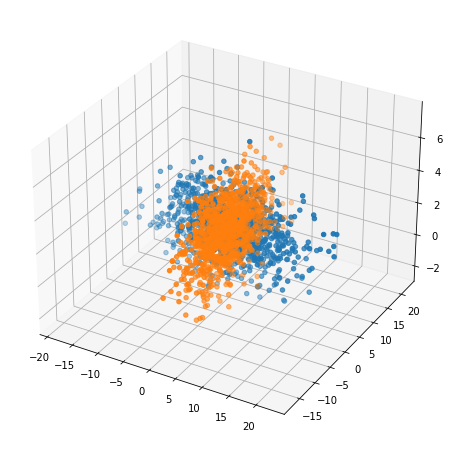

Logistic regression accuracy on trainning (1000):  0.513
Naive Bayes accuracy on trainning (1000): 0.856
When analyzing the  data, the naive bayes algorithim is preffered as the logistic regression can not perform properly due to the inability to achieve linear seperability of the data at any axis. The naive bayes algorithim can perform more properly as it can assume that the data features are independant. 


In [14]:
from scipy.stats import multivariate_normal 


a1 = [40,2,2]
cov1 = np.diag(a1)
mean1 = [2,2,2]
x1, y1, z1 = np.random.multivariate_normal(mean1, cov1, 1000).T

a2 = [2,40,2]
cov2 = np.diag(a2)
mean2 = [2,2,2]
x2, y2, z2 = np.random.multivariate_normal(mean2, cov2, 1000).T



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1)
class_0 = np.array([x1, y1, z1])
class_0 = class_0.T
ax.scatter(x2, y2, z2)
plt.show()
class_1 = np.array([x2, y2, z2 ])
class_1 = class_1.T


x_training = np.concatenate((class_0,class_1), axis=0)
Y_training = np.concatenate((np.zeros(class_0.shape[0]), np.ones(class_1.shape[0])))

#Logistic
lrgd1 = LogisticRegressionGD(eta=best_eta, eps=best_eps)
lrgd1.fit(x_training, Y_training)

#Naive 
NbG = NaiveBayesGaussian(k=2)
NbG.fit(x_training, Y_training)



LogisticR_accuracy_on_training1 = calc_acc(lrgd1,x_training, Y_training)
NB_GMM_accuracy_on_training1 = calc_acc(NbG,x_training, Y_training)

print("Logistic regression accuracy on trainning (1000): ", LogisticR_accuracy_on_training1)
print("Naive Bayes accuracy on trainning (1000):", NB_GMM_accuracy_on_training1)
print("When analyzing the  data, the naive bayes algorithim is preffered as the logistic regression can not perform properly due to the inability to achieve linear seperability of the data at any axis. The naive bayes algorithim can perform more properly as it can assume that the data features are independant. ")



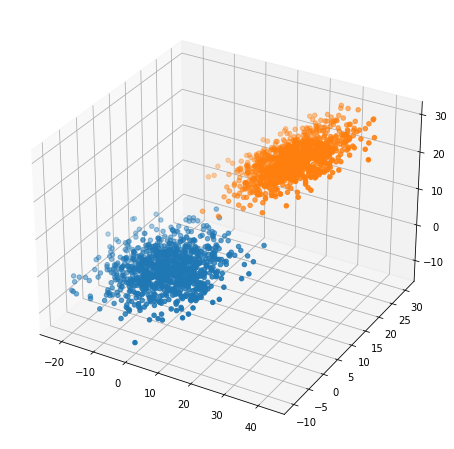

Logistic regression accuracy on trainning (1000):  0.9995
Naive Bayes accuracy on trainning (1000): 0.5
On the above data the logistic regression algorithim is more preferable as the data is lineraly seperatable while the naive bayes algorithim can not as easily classify the data as it is conditionally dependant. 


In [15]:
from scipy.stats import multivariate_normal 



cov1 = [[50, 10, 0], [10, 10, 10], [10, 10, 10]]
mean1 = [0, 0, 0]
x1, y1, z1 = np.random.multivariate_normal(mean1, cov1, 1000).T


cov2 = [[50, 10, 20], [10, 10, 10], [10, 10, 10]]
mean2 = [20,20,20]
x2, y2, z2 = np.random.multivariate_normal(mean2, cov2, 1000).T



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1)
class_0 = np.array([x1, y1, z1])
class_0 = class_0.T
ax.scatter(x2, y2, z2)
plt.show()
class_1 = np.array([x2, y2, z2 ])
class_1 = class_1.T


x_training = np.concatenate((class_0,class_1), axis=0)
Y_training = np.concatenate((np.zeros(class_0.shape[0]), np.ones(class_1.shape[0])))

#Logistic
lrgd1 = LogisticRegressionGD(eta=best_eta, eps=best_eps)
lrgd1.fit(x_training, Y_training)

#Naive 
NbG = NaiveBayesGaussian(k=2)
NbG.fit(x_training, Y_training)



LogisticR_accuracy_on_training1 = calc_acc(lrgd1,x_training, Y_training)
NB_GMM_accuracy_on_training1 = calc_acc(NbG,x_training, Y_training)

print("Logistic regression accuracy on trainning (1000): ", LogisticR_accuracy_on_training1)
print("Naive Bayes accuracy on trainning (1000):", NB_GMM_accuracy_on_training1)
print("On the above data the logistic regression algorithim is more preferable as the data is lineraly seperatable while the naive bayes algorithim can not as easily classify the data as it is conditionally dependant. ")
